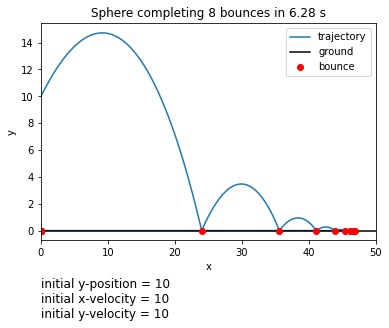

In [ ]:
# Exercise 1

# the necessary packages (matplotlib.pyplot and numpy) are imported.
import numpy as np
import matplotlib.pyplot as plt

# variable 'new_line' is set to the string '\n' to add new lines in an f-string.
new_line = '\n'

# chosen object: sphere

# defining the necessary constants:

m = 0.3                     # mass of the object in kg.
g = 9.8                     # acceleration due to gravity in m/s^2.
rho = 1.2                   # density of the air in kg/m^3.
Cd = 0.47                   # drag coefficient of the object.
A = 0.01                    # cross-sectional area of object in m^2.
e = 0.54                    # coefficient of restitution.
collisions = 8               # maximum amount of bounces/collisions the object is allowed to have with the ground.


# defining the initial position and velocity conditions:

r0 = [0, 10]                # initial position vector of the object in [x,y] format, units m.
v0 = [10, 10]               # initial velocity vector of the object in [x,y] format, units m/s.

# defining the time-step (changes accuracy of calculation):
dt = 0.001  # time step in seconds.
t_max = np.arange(0,10,dt)  # maximum time in seconds.

# function calculate_drag_force() is created to calculate the drag force on the object.
def calculate_drag_force(rho,Cd,A,v):
    """
    This function calculates and returns the drag force on the object.

    Input arguments:
    rho: (float)        density of the air in kg/m^3.
    Cd: (float)         drag coefficient of the object.
    A: (float)          cross-sectional area of object in m^2.
    v: (numpy array)    velocity vector of the object in m/s.

    Returns:
    F_drag: (numpy array)   the force of drag on the object in N.
    """
    # vectorization:
    v_mag = np.linalg.norm(v)   # the magnitude of the velocity vector
    v_unit = v / v_mag  # the velocity unit vector
    F_drag_mag = 0.5 * rho * Cd * A * v_mag**2  # the magnitude of our drag force
    F_drag = (-F_drag_mag) * v_unit    # this is now a force vector, [Fx,Fy]

    # the calculated F_drag value is returned.
    return F_drag

# function forward_euler() simulates the movement of the object subject to gravitational and drag force using the forward euler method.
def forward_euler(r0,v0,dt,t_max,m,Cd,A,collisions):
    """
    Calculates the motion of an object with given parameters subject to gravitational force and drag force.

    Input arguments:
    r0: (list)      initial position vector of the object in the form [x,y]
    v0: (list)      initial velocity vectir of the object in the form [v_x,x_y]
    dt: (float)     the time step in seconds.
    t_max: (array)  array with time values in steps of 'dt'.
    m: (float)      mass of the object in kg.
    Cd: (float)     the drag coefficient of the object.
    A: (float)      the cross-sectional area of the object in m^2.
    collisions: (integer)   the maximum amount of bounces/collisions the object is allowed to have with the ground.

    Returns:
    r: (array)      array of the position vectors to be plotted.
    c: (integer)    the number of bounces that have occured.
    t: (float)      the amount of time the simulation has spanned.
    """
    # the position, velocity and acceleration vectors are defined as numpy arrays.
    r = np.zeros((len(t_max), 2))   # the position vector.
    v = np.zeros((len(t_max), 2))     # the velocity vector.
    a = np.zeros((len(t_max), 2))     # the acceleration vector.

    # the first elements of arrays 'r' and 'v' is assigned the initial conditions.
    r[0] = r0
    v[0] = v0

    # variable 'c' is initially set to 0 and will be used to count the number of collisions with the ground.
    c = 0

    # a for loop is created and iterates over t_max.
    for i in range(len(t_max)-1):
        F_drag = calculate_drag_force(rho,Cd,A,v[i])    # F_drag is calculated for each time step.
        F_grav = np.array([0,m*(-g)])   # the gravitational force vector in N.
        F_total = F_drag + F_grav   # the magnitude of the total force in units N.
        a[i] = F_total / m  # the acceleration vector is calculated
        v[i+1] = v[i] + a[i] * dt   # the next element of the velocity vector is updated.
        r[i+1] = r[i] + v[i+1] * dt # the next element of the position vector is updated.

        # if the y-position is zero: reverse velocity vector and reduce it by a factor of e (bouncing of the object)
        if r[i+1][1] <= 0:
            r[i+1][1] = 0
            v[i+1][1] *= -e
            c += 1

        # if any of the two stopping coditions are fulfilled, the loop is broken out of.
        if c == collisions or (i+1)*dt >= np.max(t_max):
            t = (i+1)*dt
            break

    # the values of the position vector, c (number of collisions) and t (time of simulation) are returned.
    return r, c, t

# r, c and t are assigned their values when calling the forward_euler() function with the defined conditions.
r, c, t = forward_euler(r0, v0, dt, t_max, m, Cd, A, collisions)

# 'bounces' is initially set to an empty list.
bounces = []

# a for loop iterates over the array 'r' and appends the index in 'r' where the object bounces.
for i in range(1, len(r)):
    if r[i][1] == 0:
        bounces.append(i)

# the graph of the computation is graphed.
plt.plot(r[0:len(r),0], r[0:len(r),1], label="trajectory")

# a ground line is added (at y=0):
plt.axhline(y=0, color = 'black', label="ground")

# the red dots representing the bouncing of the object are added.
plt.plot(r[bounces,0], r[bounces,1], 'ro', label="bounce")

# the x-domain of the graph is set to [0,50]
plt.xlim(0,50)

# a title with the chosen object, number of bounces, and time of the simulation is added
plt.title(f'{"Sphere" if m == 0.3 else "Cube"} completing {c} bounces in {round(t,2)} s')

# a legend is added.
plt.legend()

# x and y axis labels are added:
plt.xlabel('x')
plt.ylabel('y')

# text is added below the graph to state the initial conditions.
plt.text(0, -6.5, f'initial y-position = {r0[1]}{new_line}initial x-velocity = {v0[0]}{new_line}initial y-velocity = {v0[1]}', fontsize=12)

# the graph is presen
plt.show()



The infinite bouncing of the object is caused by the fact that the forward euler method is not exact and instead involves the approximation of the solution for the next step based on the current values and its derivative. This, coupled with the fact that the objects velocity vector is reversed and reduced by a factor 'e' after every bounce, means that the velocity of the object will never reach zero and instead tend towards it after every bounce, resulting in and infinite bouncing sequence. A stopping mechanism such as the one implemented in the code is therefore necessary to prevent it.

In [ ]:
# Exercise 2.1

# the necessary packages (matplotlib.pyplot and numpy) are imported.
import numpy as np
import matplotlib.pyplot as plt

# a function mindpoint() is defined to calculate the integral of a function using the midpoint rule.
def midpoint(f,bound1,bound2,n):
    """
    This function calculates and returns the definite integral of the function 'f' using the midpoint rule.

    Input arguments:
    f: ()           the function to be integrated
    bound1: (float) the value of the lower bound of the integral.
    bound2: (float) the value of the upper bound of the integral.
    n: (integer)    the amount of graphs to be plotted.

    Returns:
    graphs:     n subplots of the function with the midpoint rectangles and the calculated integral value and error for each graph.
    """
    # a set of 'n' subplots is created
    fig,ax=plt.subplots(1,n,figsize=(n*6,n*3),dpi=1000)

    # a for loop iterated over the subplots.
    for i in range(1,n+1):
        # for each subplot, x is defined as the linspace between the defined bounds.
        x=np.linspace(bound1,bound2,3**i)

        # y is defined as the defined function of the input argument.
        y=f(x)

        # for each subplot, the defined x and y values are plotted in red for 3^i points.
        ax[i-1].plot(x,y,color='red')

        # h is initially defined as an empty list.
        h=[]

        # a for loop iterates over h appends the rectangle height values.
        for j in range(len(x)-1):
            h.append((x[j]+x[j+1])/2)

        # a is defined as the function with input h (rectangle heights).
        a=f(h)

        # for each subplot, the bar graph is plotted.
        ax[i-1].bar(h,a,width=h[1]-h[0])

        # s is initially set to zero.
        s=0

        # a for loop iterates over the 'h' list to find the integral for each of its values (area below the rectangles), appending it to s.
        for j in range(len(h)-1):
            s=s+(h[j+1]-h[j])*a[j]

        # the error is calculated.
        err=2-s

        # for each subplot, a title, axis label and grid is added.
        ax[i-1].title.set_text('s='+str(s.round(4))+ ', error='+str(err.round(4)))
        ax[i-1].grid()
        ax[i-1].set_xlabel('x')
        ax[i-1].set_ylabel('y')

# the function midpoint() is called uppon.
midpoint(np.sin,0,3.14159,3) # Does not accept np.pi() as bound2

In [ ]:
# Exercise 2.2

# the necessary packages (matplotlib.pyplot and numpy) are imported.
import numpy as np
import matplotlib.pyplot as plt

# a function trapez() is defined to calculate and return the integral of a function using the trapez method.
def trapez(f,bound1,bound2,n):
    """
    This function calculates and returns the integral of a function using the trapez method.

    Input arguments:
    f: ()   the function to be evaluated.
    bound1: (float) the value of the lower bound of the integral.
    bound2: (float) the value of the upper bound of the integral.
    n: (integer)    the amount of graphs to be plotted.

    Returns:
    graphs:     n subplots of the function with the midpoint rectangles and the calculated integral value and error for each graph.
    """
    # a set of n subplots is created.
    fig,ax=plt.subplots(1,n,figsize=(n*6,n*3),dpi=1000)

    # a for loop iterates over the subplots.
    for i in range(1,n+1):
        # for each subplot, x is defined as the linspace between the defined bounds.
        x=np.linspace(bound1,bound2,3**i)

        # y is defined as the defined function of the input argument.
        y=f(x)

        # for each subplot, the defined x and y values are plotted in red for 3^i points.
        ax[i-1].plot(x,y,color='red')

        # a is initially defined as an empty list.
        a=[]

        # a for loop iterates over the midline values of the trapezoids and appends them to a.
        for j in range(len(y)-1):
            a.append((y[j]+y[j+1])/2)

        # s is initially set to zero.
        s=0

        # a for loop iterates over a and calculates the area of the trapezoids, adding it to s.
        for j in range(len(a)-1):
            s=s+a[j]*(x[1]-x[0])

        # the value of the error is calculated.
        err=2-s

        # for each subplot, a title, axis labels and grid is added.
        ax[i-1].title.set_text('s='+str(s.round(4))+', error='+str(err.round(4))) # Places title, axis labels and grid
        ax[i-1].grid()
        ax[i-1].set_xlabel('x')
        ax[i-1].set_ylabel('y')

# the function trapez() is called uppon.
trapez(np.sin,0,3.14159,3)

In [ ]:
# Exercise 2.3

# the necessary packages (matplotlib.pyplot and numpy) are imported.
import numpy as np
import matplotlib.pyplot as plt

# The same functions now iterate through n values until the error is less than 0.01
# The only difference is that they don't plot anymore and that the while loop is now checking the error value

def midpoint_n(f,bound1,bound2):
  n=0
  err=2
  while err>0.01:
    n=n+1
    x=np.linspace(bound1,bound2,3**n)
    y=f(x)
    h=[]
    for j in range(len(x)-1):
        h.append((x[j]+x[j+1])/2)
    a=f(h)
    s=0
    for j in range(len(h)-1):
        s=s+(h[j+1]-h[j])*a[j]
    err=2-s
  print('Minimal n value for midpoint method is '+str(n))

def trapez_n(f,bound1,bound2):
  n=0
  err=2
  while err>0.01:
    n=n+1
    x=np.linspace(bound1,bound2,3**n)
    y=f(x)
    a=[]
    for j in range(len(y)-1):
        a.append((y[j]+y[j+1])/2)
    s=0
    for j in range(len(a)-1):
        s=s+a[j]*(x[1]-x[0])
    err=2-s
  print('Minimal n value for trapezoid method is '+str(n))

midpoint_n(np.sin,0,3.14159)
trapez_n(np.sin,0,3.14159)

Minimal n value for midpoint method is 3
Minimal n value for trapezoid method is 3


We get this result in the code of exercise 2.3 by doing as follows:

Midpoint method:
we use a while loop to increase the value of n for each iteration (starting at n=0) and compute the integral of the function with 3^n points, calculating the difference between the approximate and actual value of the integral (error) using the midpoint method/function previously defined. Once the condition is fulfilled (error is less than or equal to 0.01), the loop is broken out of and the value of n is printed.

Trapezoid method:
we use a while loop to increase the value of n for each iteration (starting at n=0) and compute the integral of the function using the trapezoid method/function previously defined with the same amount of points (3^n). The difference between the approximate and actual value of the integral is calculated (error) and once the error fulfills the condition of being less than or equal to 0.01, the loop is broken out of and the value of n is printed.

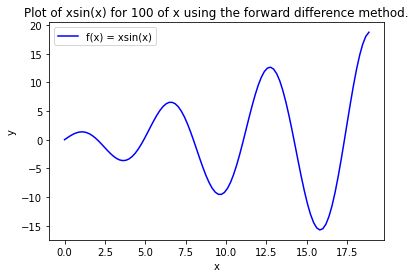

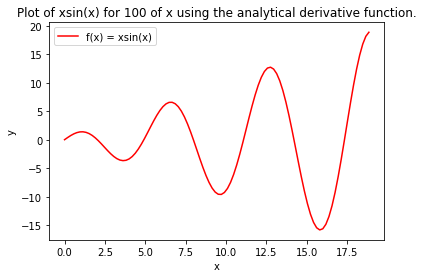

In [ ]:
# Exercise 2.4

# the necessary packages (matplotlib.pyplot and numpy) are imported.
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*np.sin(x)

def derivative_of_f(x):
    return np.sin(x) + x*np.cos(x)

def forward_rule(x,fun,h):
    derivative = (fun(x+h) - fun(x - h))/(2*h)
    return derivative

# x_vals is set to the linspace from 0 to 6 pi, with 100 values.
x_vals = np.linspace(0,6*np.pi,100)

# h is set to the difference between two values in x_vals.
h = x_vals[1] - x_vals[0]

# plot 1 and 2 are assigned the return values of the functions being called on.
plot1 = forward_rule(x_vals,f,h)
plot2 = derivative_of_f(x_vals)

# the functions are plotted in separate graphs, with a title, legend, x and y axis labels.
plt.plot(x_vals,plot1, label="f(x) = xsin(x)", color="blue")
plt.title(f"Plot of xsin(x) for {len(x_vals)} of x using the forward difference method.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(x_vals,plot2, label="f(x) = xsin(x)", color="red")
plt.title(f"Plot of xsin(x) for {len(x_vals)} of x using the analytical derivative function.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


